## Korean apartment price trend analysis  
#### 전국 신규 민간 아파트 분양가격 동향   
- 참고자료1 : [[전국 신규 민간 아파트 분양가격 동향]](  https://github.com/corazzon/OpenDataWrangling/blob/master/apt_presale_price.ipynb)  
- 참고자료2 : [[공공데이터 포탈]](https://www.data.go.kr/data/3035522/fileData.do)

#### 학습목표  
- pandas의 pivot_table() 사용법을 익힌다.
- plotnine의 ggplot 시각화 라이브러리 사용법을 익히고, matplotlib, seborn과 비교해본다.

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.07.21 </div> 
<div style="text-align: right"> Last update: 2020.07.21 </div> 

### 1. Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import missingno as msno
from plotnine import * # plotnine 내에 aes 등 다른 라이브러리도 import 해야하므로 반드시 이렇게..
# from plotnine import ggplot
import re

In [3]:
# Options for pandas
pd.options.display.max_columns = 60

mpl.rcParams['axes.unicode_minus'] = False
_path = "c:\Windows\Fonts\KoPubWorld Dotum Bold.ttf"
_font_name = font_manager.FontProperties(fname=_path).get_name()
rc('font', family=_font_name)
mpl.rcParams['axes.unicode_minus']=False # 마이너스 폰트 깨짐방지

### 2. 데이터 읽기

In [4]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/Apartment_price.csv'
data = pd.read_csv(url, encoding = 'euc-kr', engine = 'python')

In [5]:
data.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [6]:
data.shape

(4590, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4285 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


- 분양가격이 숫자타입이 아니다.

In [8]:
data.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

### 3. 데이터 살펴보기

결측치 확인하기

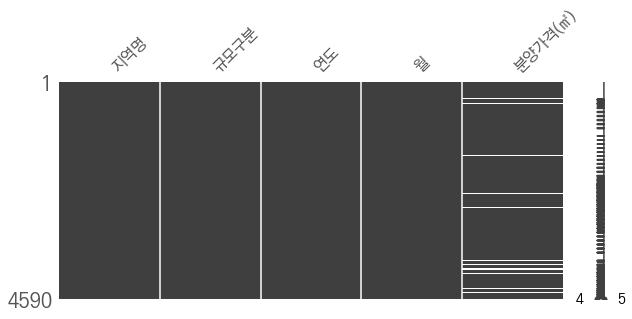

In [9]:
msno.matrix(data, figsize = (10, 4))

In [10]:
data.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    305
dtype: int64

- 분양가격에 결측치가 있음

컬럼명 변경하기

In [11]:
data.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [12]:
data = data.rename(columns={'분양가격(㎡)': '분양가격'})

In [13]:
data.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격'], dtype='object')

데이터타입 변경하기

In [14]:
data['연도'] = data['연도'].astype(str)
data['월'] = data['월'].astype(str)

In [15]:
# 분양가격은 숫자형로 변경하고자 한다.
# 문자열을 변경하는 방법은 다음중 하나를 사용하면 된다.
# data['분양가격'] = data['분양가격'].astype('float64')
# data['분양가격'] = data['분양가격'].apply(pd.to_numeric)
# data['분양가격'] = pd.to_numeric(data['분양가격'])

# 그런데 문자 값이나 결측치가 있는 경우 위 첫번째, 두번째는 사용이 불가능하다.

In [16]:
data['분양가격'] = pd.to_numeric(data['분양가격'], errors = 'coerce') #coerce : 에러 무시

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4590 non-null   object 
 1   규모구분    4590 non-null   object 
 2   연도      4590 non-null   object 
 3   월       4590 non-null   object 
 4   분양가격    4184 non-null   float64
dtypes: float64(1), object(4)
memory usage: 179.4+ KB


평당 분양가격 구하기

In [18]:
data['평당분양가격'] = data['분양가격']*3.3

2017년 데이터만 살펴보기

In [19]:
data2017 = data[data['연도']=='2017']

In [20]:
data2017.head()

,지역명,규모구분,연도,월,분양가격,평당분양가격
1275,서울,전체,2017,1,6450.0,21285.0
1276,서울,전용면적 60㎡이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102㎡초과,2017,1,6771.0,22344.3


In [21]:
data2017.shape

(1020, 6)

아파트 평수 살펴보기

In [22]:
data['규모구분'].value_counts()

전체                   918
전용면적 85㎡초과 102㎡이하    918
전용면적 60㎡이하           918
전용면적 60㎡초과 85㎡이하     918
전용면적 102㎡초과          918
Name: 규모구분, dtype: int64

### 4. 데이터 조작하기 

연도별 통계결과 살펴보기

In [23]:
data.groupby('연도').describe()

분양가격                                                             \
      count         mean          std     min     25%     50%      75%   
연도                                                                       
2015  243.0  2788.707819   976.861182  1868.0  2225.0  2516.0  3025.50   
2016  984.0  2934.250000  1071.441561  1900.0  2282.0  2672.0  3148.50   
2017  899.0  3139.541713  1107.584870  1976.0  2365.0  2849.0  3456.00   
2018  919.0  3326.951034  1186.090839  2076.0  2525.0  2952.0  3698.00   
2019  912.0  3693.422149  1563.205566  2124.0  2635.5  3395.0  4066.25   
2020  227.0  3856.074890  1755.193638  2297.0  2667.0  3534.0  4275.50   

              평당분양가격                                                       \
          max  count          mean          std     min      25%      50%   
연도                                                                          
2015   7092.0  243.0   9202.735802  3223.641902  6164.4  7342.50   8302.8   
2016   8096.0  984.0   9683.025000  3535.757150  6270.0  7530.60   8817.6   
2017   7887.0  899.0  10360.487653  3655.030071  6520.8  7804.50   9401.7   
2018   8098.0  919.0  10978.938411  3914.099768  6850.8  8332.50   9741.6   
2019  12728.0  912.0  12188.293092  5158.578369  7009.2  8697.15  11203.5   
2020  13835.0  227.0  12725.047137  5792.139005  7580.1  8801.10  11662.2   

                          
            75%      max  
연도                        
2015   9984.150  23403.6  
2016  10390.050  26716.8  
2017  11404.800  26027.1  
2018  12203.400  26723.4  
2019  13418.625  42002.4  
2020  14109.150  45655.5

In [24]:
data.groupby('연도').describe().T

연도                    2015          2016          2017          2018  \
분양가격   count    243.000000    984.000000    899.000000    919.000000   
       mean    2788.707819   2934.250000   3139.541713   3326.951034   
       std      976.861182   1071.441561   1107.584870   1186.090839   
       min     1868.000000   1900.000000   1976.000000   2076.000000   
       25%     2225.000000   2282.000000   2365.000000   2525.000000   
       50%     2516.000000   2672.000000   2849.000000   2952.000000   
       75%     3025.500000   3148.500000   3456.000000   3698.000000   
       max     7092.000000   8096.000000   7887.000000   8098.000000   
평당분양가격 count    243.000000    984.000000    899.000000    919.000000   
       mean    9202.735802   9683.025000  10360.487653  10978.938411   
       std     3223.641902   3535.757150   3655.030071   3914.099768   
       min     6164.400000   6270.000000   6520.800000   6850.800000   
       25%     7342.500000   7530.600000   7804.500000   8332.500000   
       50%     8302.800000   8817.600000   9401.700000   9741.600000   
       75%     9984.150000  10390.050000  11404.800000  12203.400000   
       max    23403.600000  26716.800000  26027.100000  26723.400000   

연도                    2019          2020  
분양가격   count    912.000000    227.000000  
       mean    3693.422149   3856.074890  
       std     1563.205566   1755.193638  
       min     2124.000000   2297.000000  
       25%     2635.500000   2667.000000  
       50%     3395.000000   3534.000000  
       75%     4066.250000   4275.500000  
       max    12728.000000  13835.000000  
평당분양가격 count    912.000000    227.000000  
       mean   12188.293092  12725.047137  
       std     5158.578369   5792.139005  
       min     7009.200000   7580.100000  
       25%     8697.150000   8801.100000  
       50%    11203.500000  11662.200000  
       75%    13418.625000  14109.150000  
       max    42002.400000  45655.500000

pivot_table 사용하기

In [25]:
data.pivot_table(values='평당분양가격', index = '규모구분', columns='연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968,13850.400000
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371,11967.450000
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531,11857.288235
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923,14974.600000
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816,11879.352941


In [26]:
data.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968,13850.400000
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371,11967.450000
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531,11857.288235
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923,14974.600000
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816,11879.352941


전체 대상 데이터만 추출하여 피봇테이블 만들기

In [27]:
data_all = data[data['규모구분']=='전체']
data_all = data_all.pivot_table(values='평당분양가격', index = '지역명', columns='연도').reset_index()

In [28]:
data_all.head()

연도,지역명,2015,2016,2017,2018,2019,2020
0,강원,7159.9,7011.125,7126.8,7680.750,8141.65,8225.8
1,경기,10377.4,11220.000,11850.0,13185.975,14468.85,14829.1
2,경남,7585.6,7847.950,8119.8,9019.450,9870.85,10003.4
3,경북,7170.9,7360.650,7794.9,8505.200,8856.65,9002.4
4,광주,8052.0,8898.725,9463.5,9855.725,11822.80,12681.9


2015 ~ 2020년 동안 변동액 구하기

In [29]:
data_all['변동액'] = (data_all['2020']- data_all['2015'])

In [30]:
data_all

연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,7159.9,7011.125,7126.8,7680.750,8141.650,8225.8,1065.9
1,경기,10377.4,11220.000,11850.0,13185.975,14468.850,14829.1,4451.7
2,경남,7585.6,7847.950,8119.8,9019.450,9870.850,10003.4,2417.8
3,경북,7170.9,7360.650,7794.9,8505.200,8856.650,9002.4,1831.5
4,광주,8052.0,8898.725,9463.5,9855.725,11822.800,12681.9,4629.9
5,대구,9232.3,10310.025,11455.8,12075.800,13852.025,14671.8,5439.5
6,대전,8098.2,8501.625,9044.7,10180.225,11777.700,11732.6,3634.4
7,부산,10307.0,10429.925,11577.9,12997.875,13116.400,12933.8,2626.8
8,서울,19725.2,20663.500,21375.9,22889.350,26131.050,26534.2,6809.0
9,세종,8750.5,8860.500,9135.3,10354.850,11078.925,11411.4,2660.9


In [31]:
print(data_all['변동액'].max())
print(data_all['변동액'].min())
print(data_all['변동액'].mean())

6808.999999999996
319.0
2986.305882352942


### 5. 시각화 : Plotnine

!['앤스콤의 4인방'](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1280px-Anscombe%27s_quartet_3.svg.png)

시각화의 필요성 : 앤스콤의 4인방  
- 위 데이터는 평균, 표준편차, 상관계수가 같다.  
- 그렇지만 전혀 다른 데이터이다.(요약된 데이터로만 판단할 수 없음을 보여준다.)
- 시각화를 통해서만 확인할 수가 있다.  
- ggplot cheatsheet : https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

연도별 변동 그래프 그리기  

In [32]:
data[data['지역명']=='강원'].head(100)

,지역명,규모구분,연도,월,분양가격,평당분양가격
45,강원,전체,2015,10,2167.0,7151.1
46,강원,전용면적 60㎡이하,2015,10,2286.0,7543.8
47,강원,전용면적 60㎡초과 85㎡이하,2015,10,2212.0,7299.6
48,강원,전용면적 85㎡초과 102㎡이하,2015,10,2061.0,6801.3
49,강원,전용면적 102㎡초과,2015,10,2171.0,7164.3
...,...,...,...,...,...,...
1660,강원,전체,2017,5,2084.0,6877.2
1661,강원,전용면적 60㎡이하,2017,5,2096.0,6916.8
1662,강원,전용면적 60㎡초과 85㎡이하,2017,5,2084.0,6877.2
1663,강원,전용면적 85㎡초과 102㎡이하,2017,5,2221.0,7329.3


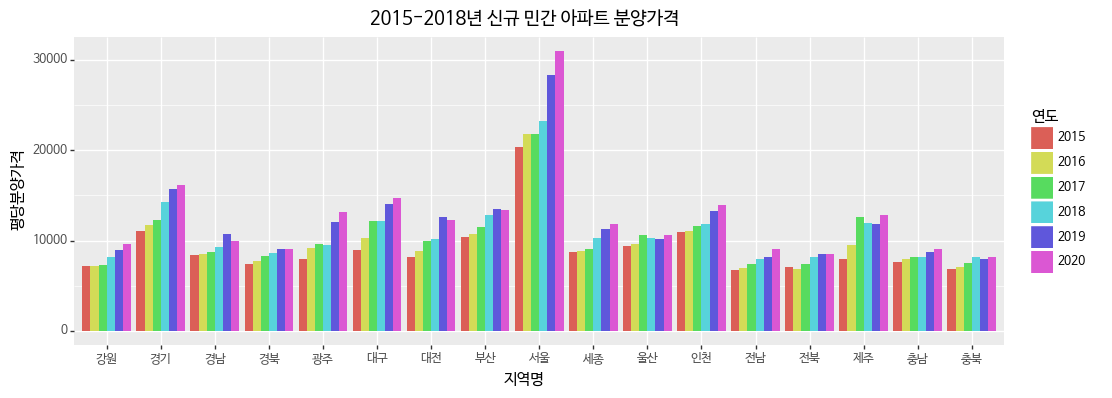

<ggplot: (-9223371868881565240)>

In [33]:
(ggplot(data, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='summary', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 4))
)

- 아래는 matplotlib로 그린 것

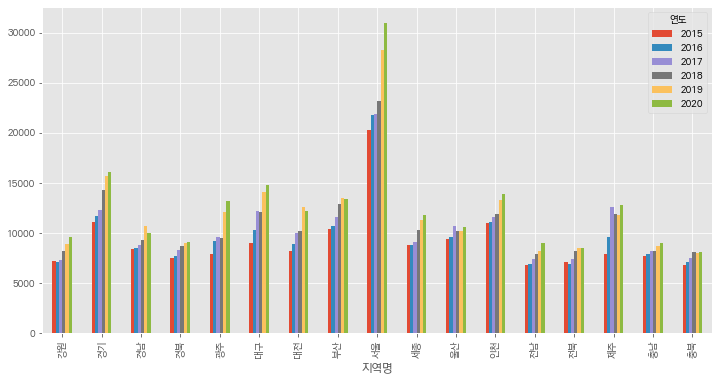

In [34]:
data.groupby(['지역명', '연도']).mean()['평당분양가격'].unstack().plot(kind = 'bar', figsize = (12,6))

- 아래는 seaborn으로 그린 것

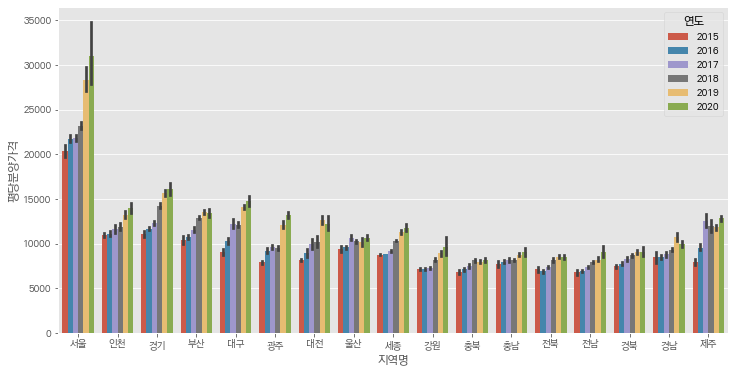

In [35]:
# 합을 그리고 싶다면
plt.figure(figsize = (12, 6)) # 만약 오차막대를 min-max가 아닌 표준편차로 설정하려면 ci = 'sd'
sns.barplot(data = data, x = '지역명', y ='평당분양가격', hue = '연도')

규모별 평당분양가격 바차트 그리기

In [36]:
data.pivot_table(values='평당분양가격', index = '규모구분', columns='지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,8569.601887,14899.624528,10358.363265,9197.411321,11280.142500,13302.362264,14875.080000,13267.930189,23790.883019,10269.164151,9974.448000,14472.587755,8316.186792,8227.958491,10604.418000,8727.611538,8218.369811
전용면적 60㎡이하,7614.283019,13420.041509,8717.694118,7918.505660,9650.987500,12117.413208,9335.138298,11412.209434,23458.952830,9323.927027,9390.975000,11354.428302,7284.407547,7651.018868,13971.475610,7909.228302,7147.115094
전용면적 60㎡초과 85㎡이하,7522.816981,12635.450943,8697.492453,8113.081132,10070.915094,11942.077358,9817.250943,11928.752830,23018.433962,9856.290566,10487.100000,11510.400000,7328.615094,7318.901887,10760.179245,7869.441509,7293.560377
전용면적 85㎡초과 102㎡이하,8851.200000,13920.271698,10057.092453,8773.814634,9296.100000,11291.646667,9037.430769,12211.307547,26990.700000,9946.137736,8861.007692,11615.875472,7949.834694,8325.511765,10709.082353,9220.737209,8408.337736
전체,7519.890566,12688.064151,8734.788679,8130.826415,10060.890566,11935.477358,9896.201887,11992.635849,22832.450943,9896.326415,10484.475000,11388.735849,7342.437736,7340.818868,10913.286792,7861.845283,7252.466038


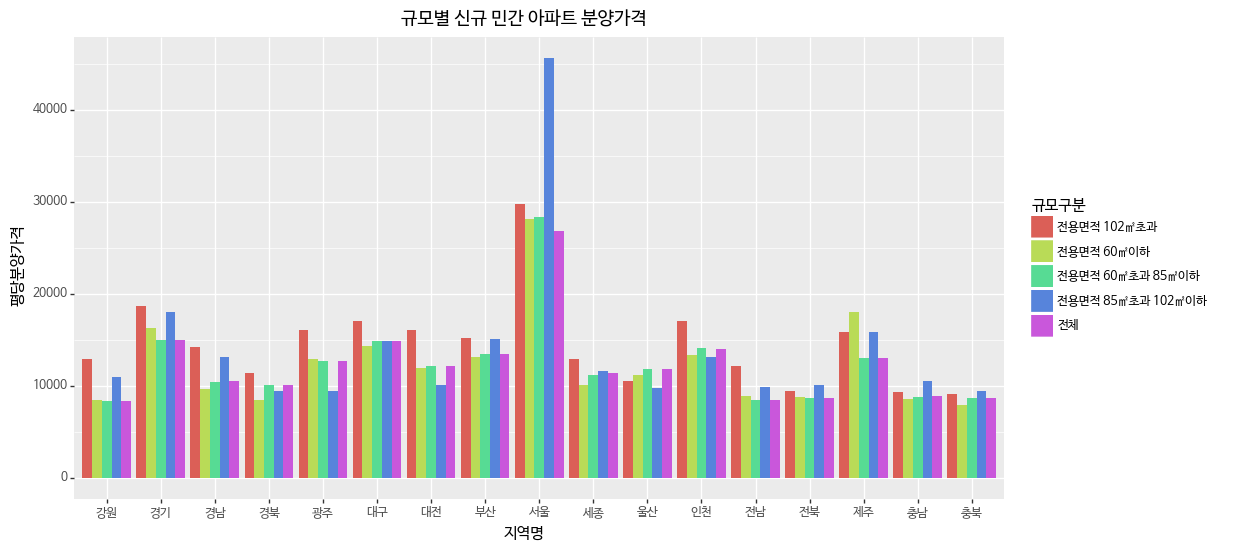

<ggplot: (-9223371868879288692)>

In [37]:
(ggplot(data, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 # dodge: 데이터를 stacking 하지 않고 늘어서 표현할 떄
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

- 규모구분결 평균 값이 아니다.
- stat를 'summary'로 설정하고 다시 차트를 그린다.

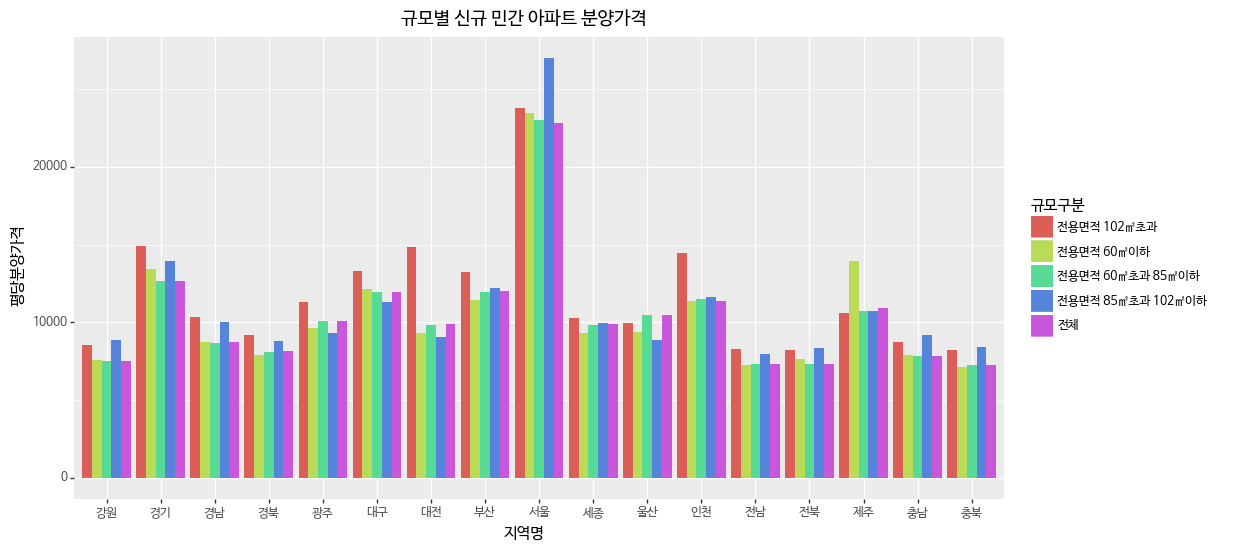

<ggplot: (-9223371868879390284)>

In [38]:
(ggplot(data, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat = "summary", position='dodge')
 # dodge: 데이터를 stacking 하지 않고 늘어서 표현할 떄
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

- 아래는 matplotlib로 그린 것

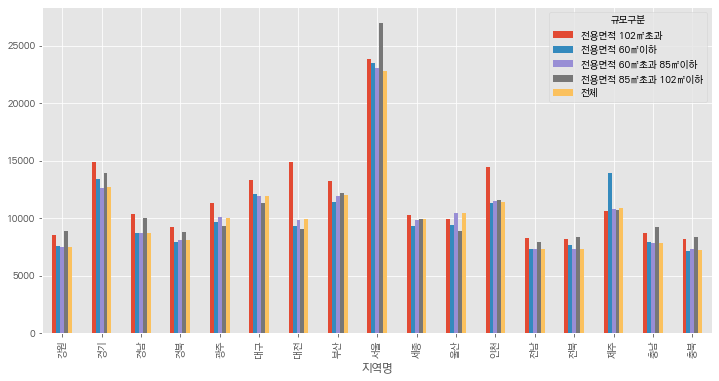

In [39]:
data.groupby(['지역명', '규모구분']).mean()['평당분양가격'].unstack().plot(kind = 'bar', figsize = (12,6))

- 아래는 seaborn으로 그린 것

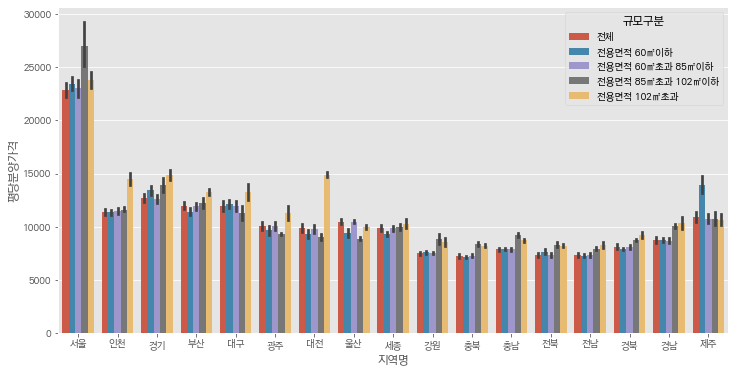

In [40]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = '지역명', y ='평당분양가격', hue = '규모구분') # 디펄트 평균 값임

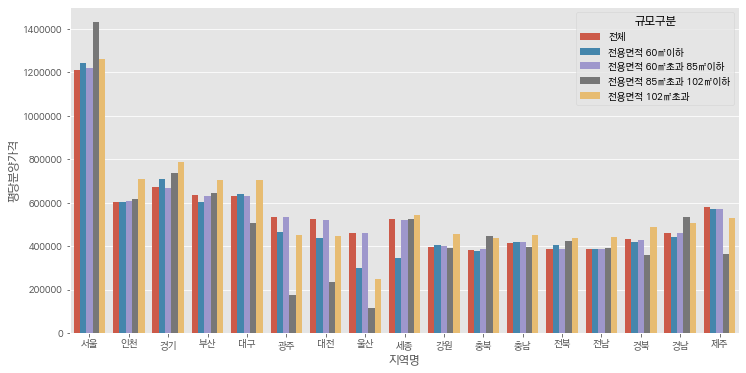

In [41]:
# 합을 그리고 싶다면
plt.figure(figsize = (12, 6)) # 만약 오차막대를 min-max가 아닌 표준편차로 설정하려면 ci = 'sd'
sns.barplot(data = data, x = '지역명', y ='평당분양가격', hue = '규모구분', ci = None, 
           estimator=np.sum)

연도별 평당분양가격 바차트 그리기

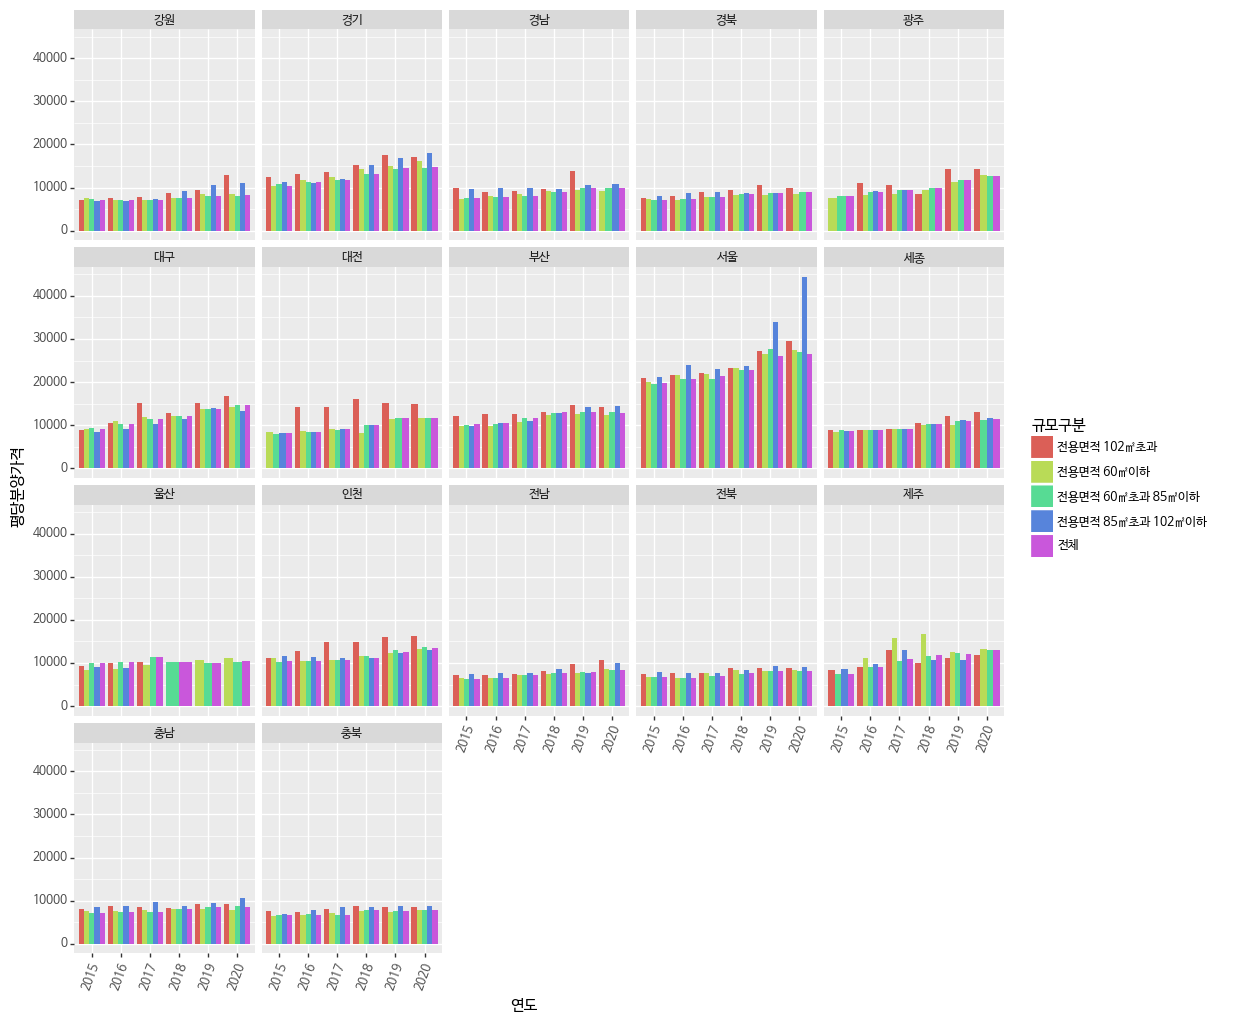

<ggplot: (-9223371868878788488)>

In [42]:
(ggplot(data)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='summary', position='dodge')
 + facet_wrap('지역명') # 지역명을 기준으로 subplot 생성
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

박스플롯 그리기

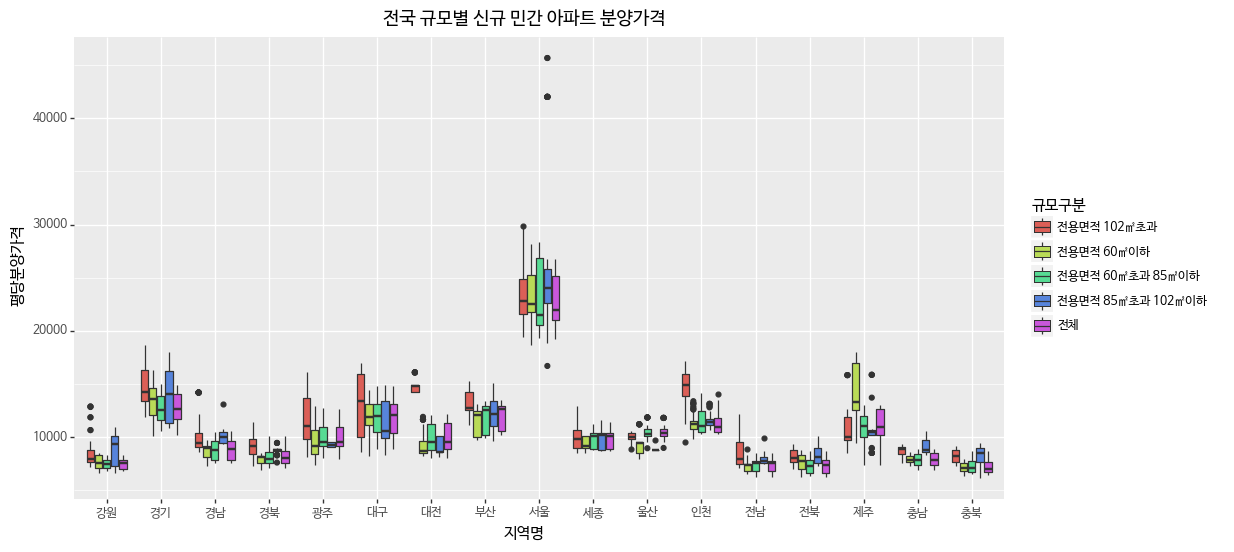

<ggplot: (-9223371868878697608)>

In [43]:
(ggplot(data, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

박스플롯 그리기
- 서울 지역의 연도별 평당 분양가격

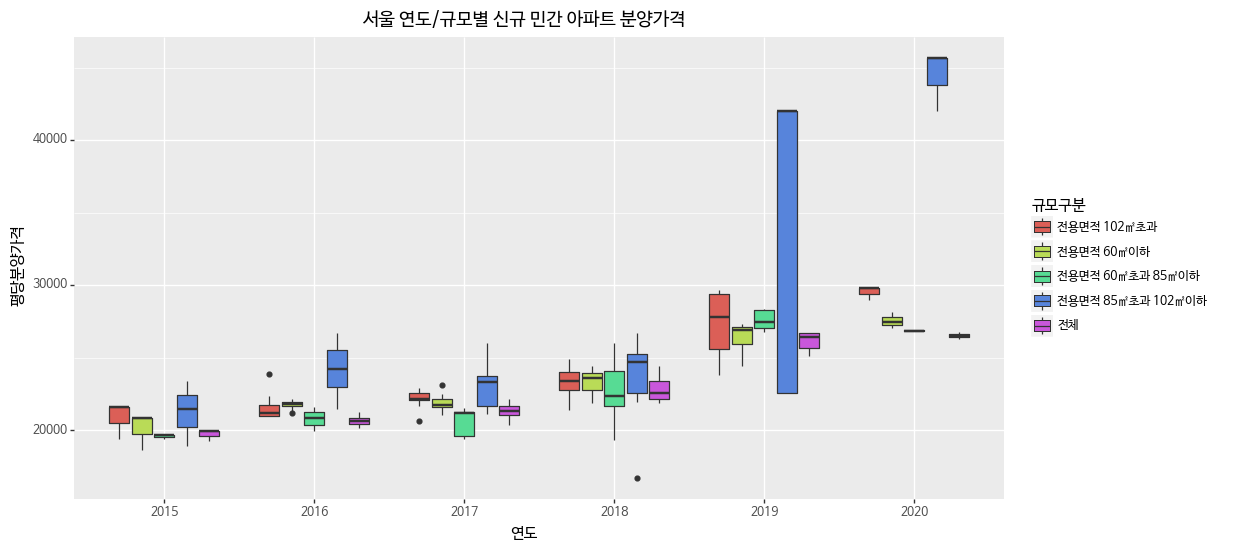

<ggplot: (-9223371868878700328)>

In [44]:
data_seoul = data[data['지역명']=='서울']
(ggplot(data_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'), figure_size = (12, 6)))

- 제주지역의 연도별 평당 분양가격

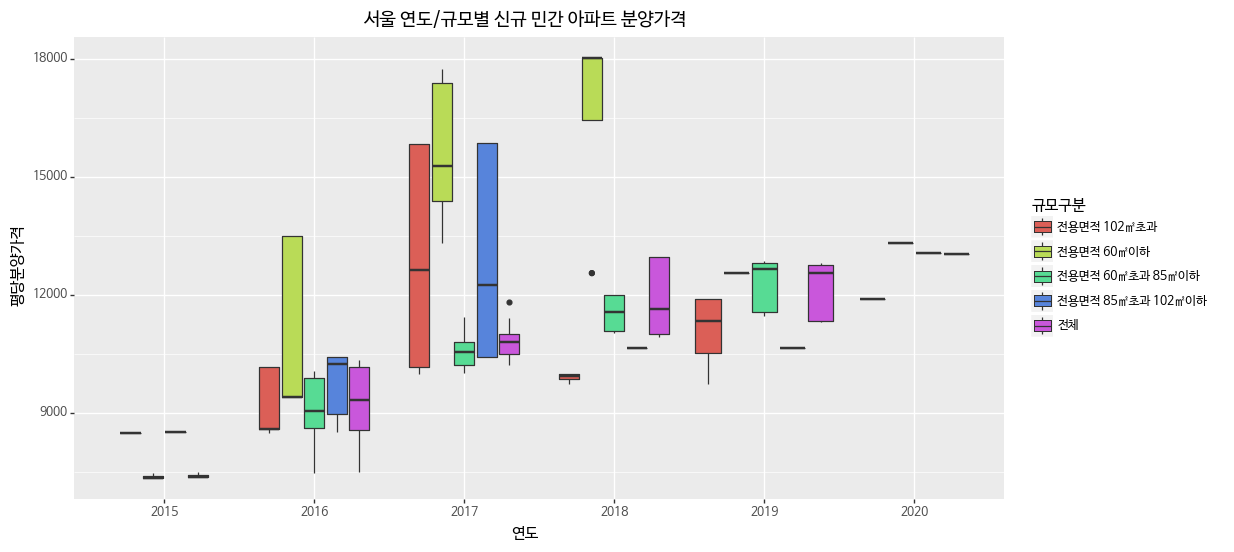

<ggplot: (-9223371868878700340)>

In [45]:
(ggplot(data[data['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'), figure_size = (12, 6)))

### 6. Tidy data 만들기 : 분석하기 좋은 데이터

데이터 읽기

In [46]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/regional_apartment_price.csv'
data = pd.read_csv(url, encoding = 'euc-kr', engine = 'python')

In [47]:
data.head()

,□ 평균 분양가격,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"


- 데이터를 다시 읽는다. : 첫번째 row skip, header = 0

In [48]:
data = pd.read_csv(url, encoding='euc=kr', skiprows=1, header = 0)

In [49]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [50]:
data.shape

(23, 27)

컬럼 만들기 : 년도, 월

In [51]:
year = data.iloc[0]
month = data.iloc[1]

In [52]:
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [53]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'

In [54]:
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [55]:
data.columns = year
data.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


- 이제 첫번째, 두번째 row를 삭제해도 된다.

In [56]:
data = data.drop(labels = data.index[[0, 1]], axis = 0)

In [57]:
data.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131


`구분`, `시군구` 컬럼의 결측치 처리

In [58]:
data['구분'] = data['구분'].fillna('')
data['시군구'] = data['시군구'].fillna('')

In [59]:
data.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131


`구분`, `시군구` 컬럼 합치기

In [60]:
data['지역'] = data['구분'] + data['시군구']

In [61]:
data.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천


melt

In [62]:
melt_columns = data.columns.copy()

In [63]:
data_melt = pd.melt(data, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', 
                        '2014년 3월','2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', 
                        '2014년 8월','2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', 
                        '2015년 1월','2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', 
                        '2015년 6월','2015년 7월', '2015년 8월', '2015년 9월'])

In [64]:
data_melt.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [65]:
data_melt.columns = ['지역', '기간', '분양가']

In [66]:
data_melt['연도'] = data_melt['기간'].apply(lambda year_month : year_month.split('년')[0])
data_melt['월'] = data_melt['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [67]:
data_melt.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [68]:
data_melt['지역'].unique()

array(['전국', '서울', '6대광역시부산', '대구', '인천', '광주', '대전', '울산', '', '경기',
       '수도권', '세종', '지방강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
      dtype=object)

- `부산`, `강원` 수정 필요

`지역` 컬럼의 강원, 부산 부분 정리

In [69]:
data_melt['지역'] = data_melt['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
data_melt['지역'] = data_melt['지역'].apply(lambda x: re.sub('지방강원','강원', x))

In [70]:
data_melt['지역'].value_counts()

       44
전남     22
대구     22
부산     22
충북     22
대전     22
세종     22
경기     22
울산     22
전북     22
경북     22
수도권    22
제주     22
충남     22
광주     22
전국     22
서울     22
강원     22
경남     22
인천     22
Name: 지역, dtype: int64

`분양가` 정리

In [71]:
data_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
dtypes: object(5)
memory usage: 18.2+ KB


- 모두 문자열이다.

In [72]:
data_melt.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


- 분양가를 숫자 타입으로 바꾸려면 먼저 `컴마(,)` 를 처리해야 한다.

In [73]:
data_melt['분양가격'] = data_melt['분양가'].str.replace(',', '').astype('int') 

In [74]:
data_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
 5   분양가격    462 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 20.0+ KB


시각화하기

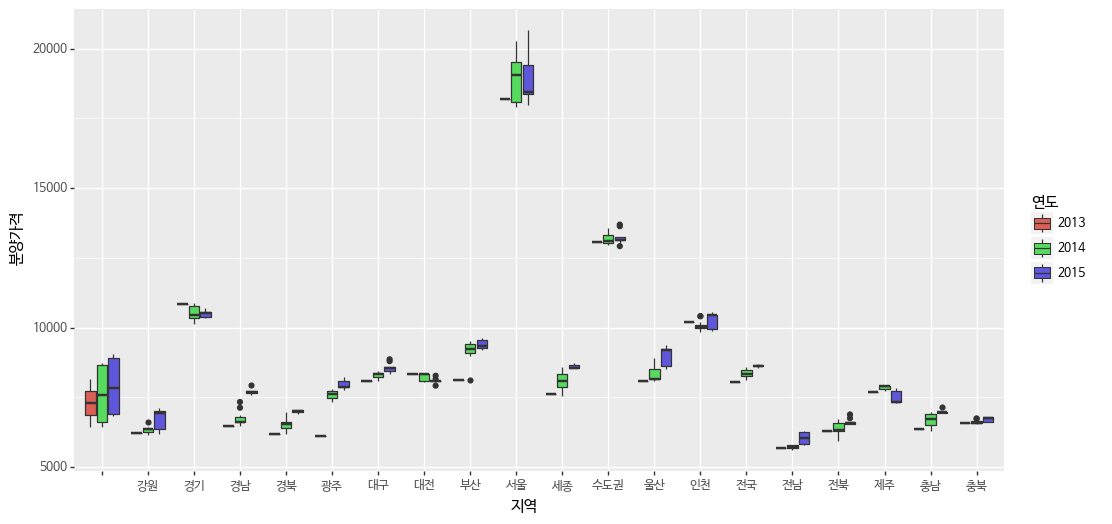

<ggplot: (-9223371868876883760)>

In [75]:
(ggplot(data_melt, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6)))

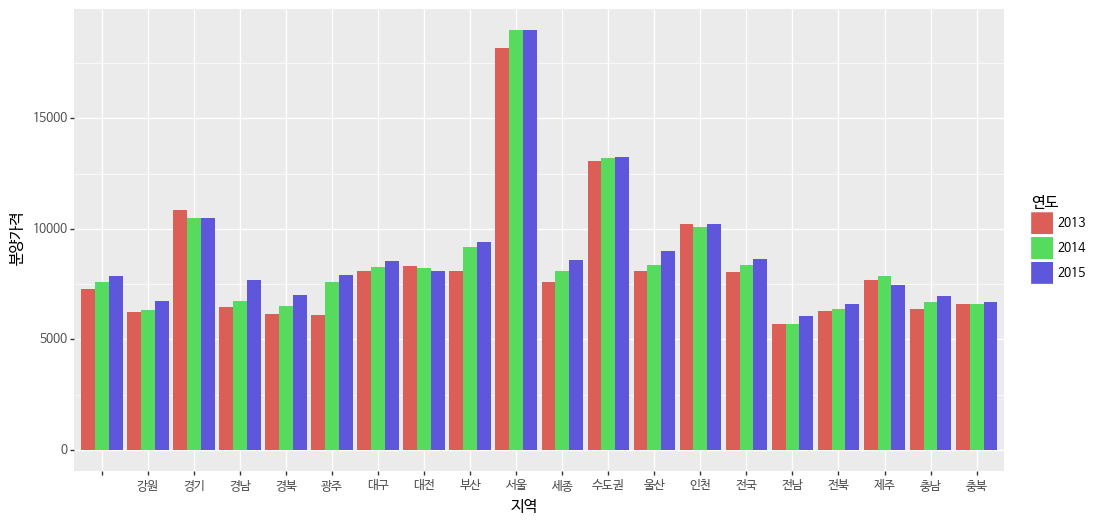

<ggplot: (-9223371868877215876)>

In [76]:
(ggplot(data_melt, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='summary', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6)))